In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def divided_differences_fast(X, Y):
    div_diff = np.zeros((len(X), len(X) + 1))
    div_diff[:, 0] = X
    div_diff[:, 1] = Y
    div_diff[:-1, 2] = (div_diff[1:, 1] - div_diff[:-1, 1])
    for i in range(3, len(X) + 1):
        div_diff[:1 - i, i] = (div_diff[1:2 - i, i - 1] - div_diff[:1 - i, i - 1])/(div_diff[i - 1:, 0] - div_diff[:1 - i, 0])
    return div_diff

In [3]:
def divided_differences(X, Y):
    div_diff = np.zeros((X.size, X.size + 1))
    div_diff[:, 0] = X
    div_diff[:, 1] = Y
    for i in range(2, X.size + 1):
        for j in range(0, X.size - i + 1):
            div_diff[j][i] = (div_diff[j + 1][i - 1] - div_diff[j][i - 1])/(div_diff[j + i - 1][0] - div_diff[j][0])       
    return div_diff

In [4]:
def newthon_polynomus(X, Y):
    div_diff = divided_differences_fast(X, Y)
    def newthon(x):
        ret_val = 0
        for i in range(1, X.size + 1):
            dy = div_diff[0][i]
            for j in range(1, i):
                dy *= (x - X[j - 1])
            ret_val += dy
        return ret_val
    return newthon

In [5]:
def lagrange(X, Y):
    def ret_fun(x):
        ret_val = 0
        for j in range(len(X)):
            yj = Y[j]
            for i in range(len(X)):
                if i != j:
                    yj *= (x-X[i])/(X[j] - X[i])
            ret_val += yj
        return ret_val
    return ret_fun

In [6]:
def lagrange_sym(X, Y):
    x = sp.symbols('x')
    f = 0
    for j in range(len(X)):
        yj = Y[j]
        for i in range(len(X)):
            if i != j:
                yj *= (x - X[i]) / (X[j] - X[i])
        f += yj
    return f

In [7]:
def chebyshev_polynomuses_sym(n):
    x = sp.symbols('x')
    T = []
    T0 = 1 + 0 * x
    T1 = x
    T.append(T0)
    T.append(T1)
    for i in range(2, n):
        Ti = 2 * x * T[i - 1] - T[i - 2]
        T.append(sp.simplify(Ti))
    return T

In [8]:
def chebyshev_roots(n, a = -1, b = 1):
    R = []
    for i in range(n):
        R.append((a + b) / 2 + (b - a) * np.cos(np.pi * (2 * i + 1)/(2 * n)) / 2)
    return R

In [9]:
def chebyshev_interpolation_sym(X, Y, n):
    x = sp.symbols('x')
    T = chebyshev_polynomuses_sym(n + 1)
    f = 0
    T[0] *= 2. ** (-0.5)
    for j in range(len(X)):
        aj = 0
        for i in range(len(X)):
            aj += Y[i] * T[j].subs(x, X[i])
        aj *= 2 / (n + 1)
        f += aj * T[j]
    return sp.simplify(f)

def chebyshev_interpolation(X, Y, n):
    C = chebyshev_interpolation_sym(X, Y, n)
    def ret_fun(x):
        return C.subs(sp.symbols('x'), x)
    return ret_fun

In [10]:
def runge_kutta_4(funct, y0, x_from, x_to, step):
    N = int((x_to - x_from) / step)
    y = np.zeros(N)
    y[0] = y0
    for n in range(0, N - 1):
        xn = step * n
        k1 = funct(xn, y[n])
        k2 = funct(xn + step / 2, y[n] + k1 / 2)
        k3 = funct(xn + step / 2, y[n] + k2 / 2)
        k4 = funct(xn + step, y[n] + k3)
        y[n + 1] = y[n] + step / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

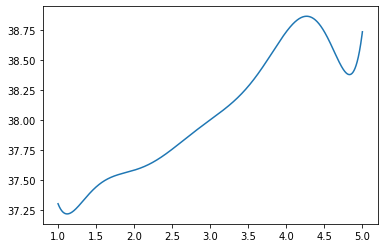

In [64]:
t = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
T = np.array([37.3, 37.58, 37.86, 38.21, 38.7, 39.26, 40.17, 40.17, 40.17])

N = newthon_polynomus(t, T)
x = np.linspace(1, 5, num = 4000)
y = np.zeros(4000)

for i in range(4000):
    y[i] = N(x[i])
    
plt.plot(x, y);

In [65]:
def deriv(x, y):
    return (y[1:] - y[:-1])/(x[1:] - x[:-1])

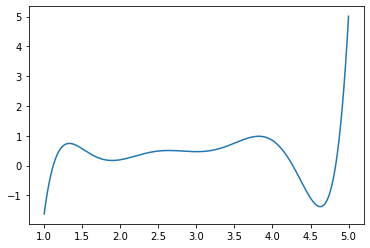

In [66]:
dN = deriv(x, y)
plt.plot(x[:-1], dN);

In [67]:
t_0 = np.argmax(dN[:3200])
print("t = ", x[t_0])
print("T = ", y[t_0])

t =  3.8197049262315583
T =  38.56586233351929
